# **Introdução ao Keras usando um backend do TensorFlow 2.0**
### **Treinamento de uma CNN simples no conjunto de dados MNIST - dígitos manuscritos**

Nesta lição, usamos o **Keras com um backend do TensorFlow 2.0** para criar um **modelo simples de rede neural convolucional** no PyTorch e treiná-lo para **reconhecer dígitos manuscritos no conjunto de dados MNIST**.
1. Carregando nosso conjunto de dados MNIST
2. Inspecionar nosso conjunto de dados 
3. Visualização do nosso conjunto de dados de imagens
5. Pré-processamento do nosso conjunto de dados
6. Criando nosso modelo
7. Treinamento do modelo
8. Plotagem dos registros de treinamento
9. Salvando e carregando nosso modelo
10. Testar nosso modelo em dados de teste

## Para utilizar o TensorFlow 2.11 no Windows !!

- Instale o WSL2
- Instale o conda/anaconda/miniconda
- crie um env
- Instale o CUDA toolkit para WSL
- instale seguindo as instruções link https://www.tensorflow.org/install/pip#windows-wsl2
- no env, instale o Jupyter (pip3 install jupyter)
- No VSCODE, abra um Terminal WSL
- Ative o env criado
- Rode o comando: jupyter-notebook

## **1. Carregando nossos dados**

Existem conjuntos de dados integrados do ```tensorflow.keras.datasets`` para carregar nossos dados. Usamos a função ```mnist.load_data()```.

Retorna: **2 tuplas**
- x_train, x_test: matriz uint8 de dados de imagem RGB com formato (num_samples, 3, 32, 32) ou (num_samples, 32, 32, 3) com base na configuração de backend image_data_format de channels_first ou channels_last, respectivamente.
- y_train, y_test: matriz uint8 de rótulos de categoria (inteiros no intervalo 0-9) com formato (num_samples, 1).

- Mais informações sobre os bancos de dados disponíveis em https://keras.io/datasets/


In [1]:
from tensorflow.keras.datasets import mnist

2025-04-19 23:43:23.934978: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745117003.947010    7304 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745117003.951529    7304 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745117003.960784    7304 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745117003.960800    7304 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745117003.960802    7304 computation_placer.cc:177] computation placer alr

In [2]:
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [3]:
#Chegando se tem acesso a GPU
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10420910651792358861
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5905580032
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6457317235661002285
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


I0000 00:00:1745117005.898474    7304 gpu_device.cc:2019] Created device /device:GPU:0 with 5632 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
# Mostrando o número de amostras em x_train, x_test, y_train, y_test
print("Dimensões em x_train: ", str(x_train.shape))

# Número de amostras em cada parte
print ("Número de amostras em nossos dados de treinamento: " + str(len(x_train)))
print ("Número de rótulos em nossos dados de treinamento: " + str(len(y_train)))
print ("Número de amostras em nossos dados de teste: " + str(len(x_test)))
print ("Número de rótulos em nossos dados de teste: " + str(len(y_test)))

# Print the image dimensions and no. of labels in our Training and Test Data
print("\n")
print ("Dimensões de um dado em x_train:" + str(x_train[0].shape))
print ("Labels em x_train:" + str(y_train.shape))
print("\n")
print ("Dimensões de um dado em x_test:" + str(x_test[0].shape))
print ("Labels em y_test:" + str(y_test.shape))

Dimensões em x_train:  (60000, 28, 28)
Número de amostras em nossos dados de treinamento: 60000
Número de rótulos em nossos dados de treinamento: 60000
Número de amostras em nossos dados de teste: 10000
Número de rótulos em nossos dados de teste: 10000


Dimensões de um dado em x_train:(28, 28)
Labels em x_train:(60000,)


Dimensões de um dado em x_test:(28, 28)
Labels em y_test:(10000,)


## **3. Visualizando nosso conjunto de dados de imagens**

Vamos dar uma olhada em algumas das imagens desse conjunto de dados
- Usando o OpenCV
- Usando o Matplotlib

In [5]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

def imshow(title, image = None, size = 6):
    if image.any():
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()
    else:
      print("Imagem não encontrada")

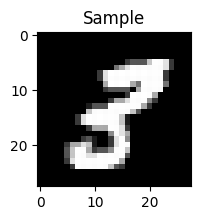

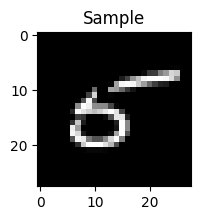

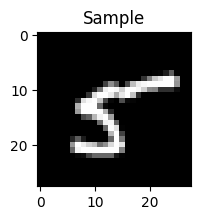

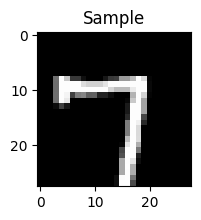

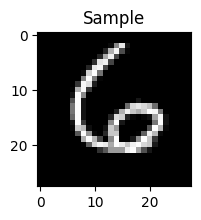

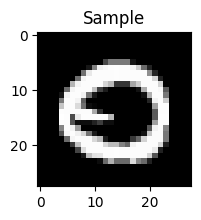

In [6]:
for i in range(0,6): #mostrando 6 random images
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    imshow("Sample", img, size = 2)

### Vamos fazer a mesma coisa, mas usando matplotlib para plotar 6 imagens**

<Figure size 640x480 with 0 Axes>

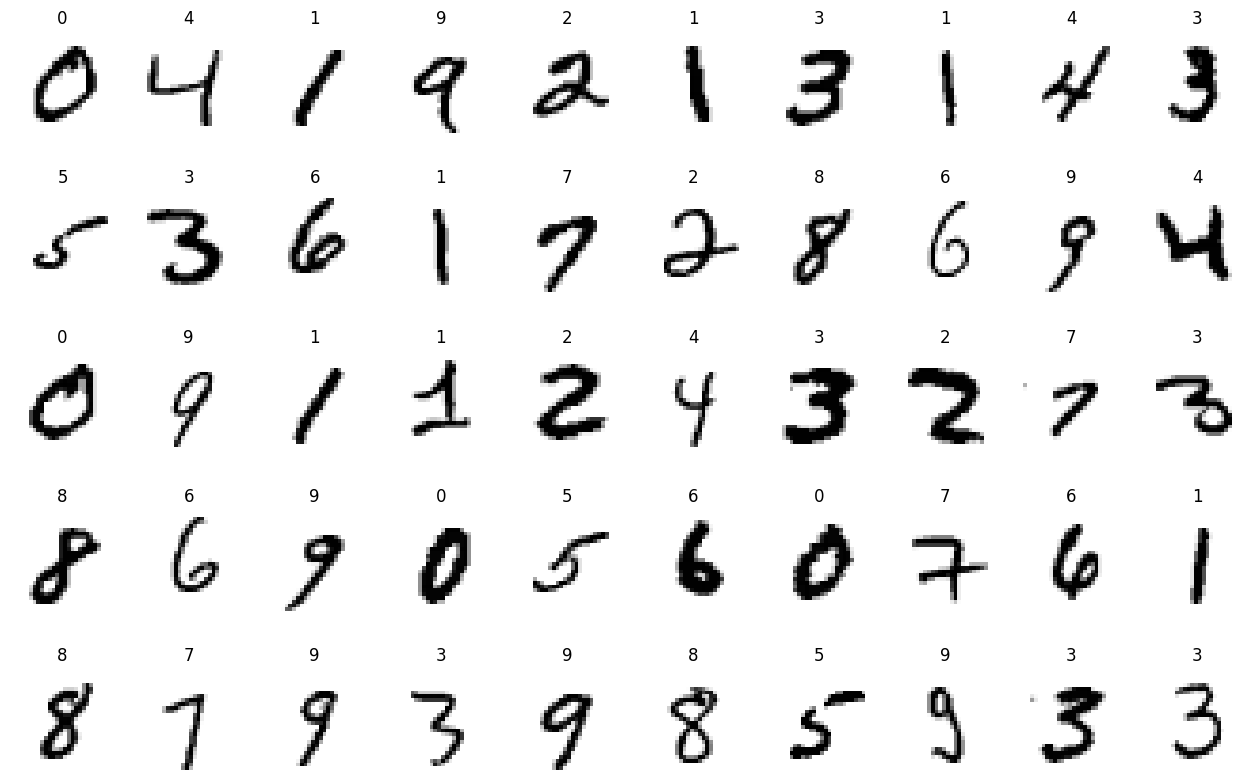

In [10]:
import matplotlib.pyplot as plt


figure = plt.figure()
plt.figure(figsize=(16,10))

num_of_images = 50 


for index in range(1, num_of_images + 1):
    #plotando 5 linhas com 10 imagens. Estamos também mostrando como título para cada uma, o rótulo verdadeiro
    plt.subplot(5, 10, index).set_title(f'{y_train[index]}') 
    plt.axis('off')
    plt.imshow(x_train[index], cmap='gray_r')